#**Actividad 13: Diagonalización - Melanie Andrea Muñoz Chavarria**

In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

#**Autovalores, autovectores, polinomio caracteristico, diagonalización.**

##**Actividad 1**
Calcular el polinomio caracteristico, los autovalores y autvectores propios de la siguiente matrices, comprobar con la solucion analitica:
\begin{equation}
A=
\begin{bmatrix}
1 & -1 & 4 \\
3 & 2 & -1 \\
2 & 1 & -1\\
\end{bmatrix}
\end{equation}



\begin{equation}
B=
\begin{bmatrix}
3 & -5 \\
1 & -1 \\
\end{bmatrix}
\end{equation}

##**Caja negra diagonalización**

Se calculan los determinantes para matrices 2x2 y 3x3, a partir de allí, se realizan operaciones para calcular los vectores propios y los valores propios, utilizando el concepto de determinente y las soluciones del sistema, soponiendo un sistema con soluciones infinitas.

Ahora, para obtener los valores propios. Primero se triangula inferiormente cada matriz $T= A - \lambda I$, donde A es la matriz que se desea digonalizar y $\lambda$ es el valor propio. Pues note que no se puede reducir el sistema totalemente, pues es básicamente el espacio nulo de la la matriz T.

Con la tringulación se obtiene una fila de ceros, y se crea un sistema asignando una variable libre. Para luego resolver, el sistema ampliadocon esta variable libre y obtener los vectores propios.

In [2]:
#Determinante matriz 2x2
def determinante2x2(A):
  det=A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]
  return det

#Determinante 3x3
def determinante3x3(B):
  M1=B[1:3,1:3]
  M2=B[1:3:1,0:3:2]
  M3=B[1:3, 0:2]

  b=np.array([M1,M2,M3])

  dim=sy.shape(B)
  sig=-1
  det=0

  for i in range(0,dim[0]):
    det=det+((sig)**i)*B[0,i]*determinante2x2(b[i])

  return det

###**Polinomio Caracteristico**

In [3]:
def polinomio_caracteristico(B):
  #Se calcula la dimensión, pues la suma de matrices solo es posible si sus diemsiones coinciden
  dim=sy.shape(B)
  l=sy.Symbol('\lambda')

  if dim==(3,3):
    I=sy.eye(3)
    C=(B-l*I)
    poli=sy.poly(determinante3x3(C),l)
    return poli

  if dim==(2,2):
    I=sy.eye(2)
    C=(B-l*I)
    poli=sy.poly(determinante2x2(C),l)
    return poli

###**Valores propios**

In [4]:
def valores_propios(B):
  l=sy.Symbol('\lambda')

  #Se resuelve el polinomio característico
  v=sy.solve(polinomio_caracteristico(B), l)

  return sy.Matrix(v)

###**Vectores propios**

Se definen las operaciones elementales para triangular la matriz y se define la función para triangularla apartir de las de anteriores

In [5]:
#Operaciones elementales

#Multiplicación por escalar
def mult_escalar(M,fila,escalar):
  M_escalar=M.copy()
  M_escalar[fila,:]=escalar*M[fila,:]

  return M_escalar

#Intercambio de filas
def inter_filas(M,i,j):
  M_intercambio=M.copy()
  M_intercambio[i,:]=M[j,:]
  M_intercambio[j,:]=M[i,:]

  return M_intercambio

#Suma de filas
def sum_filas(M,escalar,fila_operacion,fila_a_cambiar):
  M_sumaf=M.copy()

  M_sumaf[fila_a_cambiar,:]=M_sumaf[fila_a_cambiar,:]+mult_escalar(M,fila_operacion,escalar)[fila_operacion,:]

  return M_sumaf

#Triangular inferior
def triangular_inferior(B):
  #Dimesiones de filas
  n=B.shape[0]-1
  n_=B.shape[0]

  #Por si la primera entrada es cero
  if B[0,0]==0:
    B=inter_filas(B,0,2)
    B_=B.copy()

    for i in range(0,n):
      for j in range(1,n_):
        a=(i,j) #Para evitar alterar el elmento que ya es cero
        if i!=j and a!=(2,0):
          alpha_0=(1/B[i,i])*(-1)*(B[j,i]) #Escalar para reducir
          B_=sum_filas(B,alpha_0,i,j)
          B=B_
    return B

  else:

    B_=B.copy()
    for i in range(0,n):
      for j in range(1,n_):
        if i !=j:
          alpha=(-1)*(1/B[i,i])*B[j,i]
          B_=sum_filas(B,alpha,i,j)
          B=B_
    return B_

In [6]:
#Definiendo la función de valores propios
def vectores_propios(A_):
  #Variable libre
  a=sy.Symbol('a')
  #Para resolver el sistema cuando se asigne la variable libre
  y=sy.Symbol('y')
  z=sy.Symbol('z')

  dim=sy.shape(A_)
  #Matriz vacía donde se almacenan los valores propios
  C=sy.Matrix()
  #Calculo de los valores propios
  c=valores_propios(A_)

  if dim==(3,3):
    for i in range(0, len(c)):
      #La matriz menos lambda veces la identidad
      T=(A_-c[i]*sy.eye(3))

      #Triangulando
      D=triangular_inferior(T)

      #Creando un nuevo sistema ampliado con la triangulación
      P=sy.Matrix([[D[0,1],D[0,2]],
                  [D[1,1],D[1,2]]])
      #Asignando la variable libre
      b=sy.Matrix([-a*D[0,0],-a*D[1,0]])
      v=sy.Matrix([y,z])
      #Solcuión del sistema
      solucion =sy.solve(P*v - b, [y, z])
      #Vector propio
      vi=sy.Matrix([1,solucion[y]/a,solucion[z]/a])
      C=C.row_join(vi)
    return C

  if dim==(2,2):
    #Nos es necesario triangular pues una de las filas es linielamente idepediente de la otra, por tanto solo basta trabajar con una de las filas
    for i in range(0,len(c)):
      T=A_-c[i]*sy.eye(2)
      #Se despeja como si se hubiera asignado una variable libre
      s=(-1)*T[0,0]/T[0,1]
      vi=sy.Matrix([1,s])
      C=C.row_join(vi)
    return C


##**Comparando los resultados con numpy**

In [7]:
#Para la matriz A
A=np.matrix([[1,-1,4],
             [3,2,-1],
             [2,1,-1]])
A_=sy.Matrix(A)

#Para la matriz B
B=np.matrix([[3,-5],
             [1,-1]])
B_=sy.Matrix(B)

Polinomio característico

In [8]:
p_1=polinomio_caracteristico(A_)
p_2=np.poly(A)

p_3=polinomio_caracteristico(B_)
p_4=np.poly(B)

print(f'Para la matriz {A} , el polinomio caracaterírico con la caja negra es {p_1} y con numpy es {p_2}')
print('______')
print(f'Para la matriz {B} , el polinomio caracaterírico con la caja negra es {p_3} y con numpy es {p_4}')

Para la matriz [[ 1 -1  4]
 [ 3  2 -1]
 [ 2  1 -1]] , el polinomio caracaterírico con la caja negra es Poly(-\lambda**3 + 2*\lambda**2 + 5*\lambda - 6, \lambda, domain='ZZ') y con numpy es [ 1. -2. -5.  6.]
______
Para la matriz [[ 3 -5]
 [ 1 -1]] , el polinomio caracaterírico con la caja negra es Poly(\lambda**2 - 2*\lambda + 2, \lambda, domain='ZZ') y con numpy es [ 1. -2.  2.]


Valores propios

In [9]:
evals_1=valores_propios(A_)
evals_2=np.linalg.eig(A)[0]

evals_3=valores_propios(B_)
evals_4=np.linalg.eig(B)[0]
print(f'Para la matriz {A} , los valores propios con la caja negra es {evals_1} y con numpy es {evals_2}')
print('____')
print(f'Para la matriz {B} , los valores propios con la caja negra es {evals_3} y con numpy es {evals_4}')

Para la matriz [[ 1 -1  4]
 [ 3  2 -1]
 [ 2  1 -1]] , los valores propios con la caja negra es Matrix([[-2], [1], [3]]) y con numpy es [ 3. -2.  1.]
____
Para la matriz [[ 3 -5]
 [ 1 -1]] , los valores propios con la caja negra es Matrix([[1 - I], [1 + I]]) y con numpy es [1.+1.j 1.-1.j]


Vectores propios

In [10]:
evec_1=vectores_propios(A_)
evec_2=np.linalg.eig(A)[1]

evec_3=vectores_propios(B_)
evec_4=np.linalg.eig(B)[1]
print(f'Para la matriz {A} , los valores propios con la caja negra es {evec_1} y con numpy es {evec_2}')
print('____')
print(f'Para la matriz {A} , los valores propios con la caja negra es {evec_3} y con numpy es {evec_4}')

Para la matriz [[ 1 -1  4]
 [ 3  2 -1]
 [ 2  1 -1]] , los valores propios con la caja negra es Matrix([[1, 1, 1], [-1, -4, 2], [-1, -1, 1]]) y con numpy es [[ 0.40824829  0.57735027  0.23570226]
 [ 0.81649658 -0.57735027 -0.94280904]
 [ 0.40824829 -0.57735027 -0.23570226]]
____
Para la matriz [[ 1 -1  4]
 [ 3  2 -1]
 [ 2  1 -1]] , los valores propios con la caja negra es Matrix([[1, 1], [2/5 + I/5, 2/5 - I/5]]) y con numpy es [[0.91287093+0.j         0.91287093-0.j        ]
 [0.36514837-0.18257419j 0.36514837+0.18257419j]]


#**Diagonalización**
Una matriz cuadrada $A$ es diagonalizable si y solo si cada autovalor $\lambda$ de multiplicidad $m$ produce exactamente $m$ autovectores básicos; es decir, si y solo si la solución general del sistema $(A-\lambda I) \vec{x}=0$ tiene exactamente $m$ parámetros.

Para diagonalizar una matriz $A$ se necesita encontrar una matriz invertible $P$ tal que $P^{-1}AP$ sea una matriz diagonal $D$.Esto significa que las columnas de $P$ son los autovectores de $A$ y los elementos de la diagonal de $D$ son los autovalores correspondientes de $A$.

##**Actividad 2**

Considere la ecuación cuadrática $x^2-4xy+3y^2=6$, esta ecuación cuadrática se corresponde a una hiperbola, la cual puede ser escrita en forma matricial como sigue:
$A\vec{v}\cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica.

\begin{equation}
A=\begin{bmatrix}
1 & -2 \\
-2 & 3 \\
\end{bmatrix}
\end{equation}
  
1. Realice un grafico que represente la hyperbola.

- Diagonalice A, para ello construya la matrix Q de autovectores ortoganale, tal que $D=Q^{T}AQ$, en este caso se dice que A es diagonalizable ortogonalmente, donde $A=QDQ^T$.
- Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una  nueva base.
\begin{equation}
QDQ^T \vec{v} \cdot \vec{v} = d
\end{equation}

\begin{equation}
Q(DQ^T\vec{v}) \cdot \vec{v} = (DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}

\begin{equation}
(DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}

Sea $u=Q^T\vec{v}$

Luego :
\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola

In [11]:
#Definiendo la matriz
A=np.matrix([[1,-2],
             [-2,3]])
#Calculando los vectores y valores propios
eigvals=np.linalg.eig(A)[0]
eigvecs=np.linalg.eig(A)[1]

Como los vectores que presentan numpy ya están normalizados, solo basta con diagonalizar ortogonalmente. Pero hay que ganrantizar que la matriz $Q$ sea una matriz de rotación, es decir, $det(Q)=1$.

In [12]:
#Diagonal
D=np.matrix([[eigvals[0],0],
             [0,eigvals[1]]])
#Matriz ortogonal
Q=eigvecs
Q=np.transpose(Q)

#Garantizar matriz de rotación
determinante=np.linalg.det(Q)
print(determinante) #Es matriz de rotación

0.9999999999999998


Considerando la base $B=(v_1,v_2)$ los vecotres propios normalizados. La ecuación $x^2-4xy+3y^2=6$, se tiene que con respecto a la base B la ecuación está dada por: ${\lambda}_{1} {x'}^{2} +{\lambda}_{2} {y'}^{2}=6$, con ${\lambda}_{1}, {\lambda}_{2}$ los valores propios asociados a cada vector propio de $B$, respectivamente

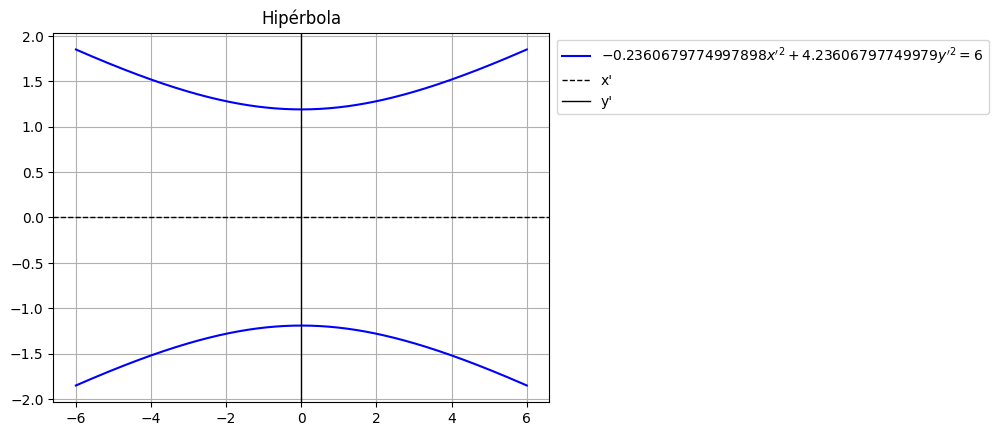

In [13]:
#Despejando la ecuación en terminos de y
def hiperbola(x):
  h=np.sqrt((6-eigvals[0]*(x**2))/(eigvals[1]))
  return h

#Intervalo para graficarla
x_inter=np.linspace(-6,6,300)
#Las soluciones positiva y negativa
y_p=hiperbola(x_inter)
y_n=(-1)*hiperbola(x_inter)


plt.figure()
plt.title('Hipérbola')
plt.plot(x_inter,y_p,'b', label=f"${eigvals[0]}x'^2+{eigvals[1]}y'^2=6$")
plt.plot(x_inter,y_n,'b')
plt.axhline(0,color='black',linewidth=1,linestyle='--', label="x'")
plt.axvline(0,color='black',linewidth=1, label="y'")
plt.legend(loc='upper right', bbox_to_anchor=(1.9, 1))
plt.grid()